In [1]:
import yfinance as yf

In [2]:
msft = yf.Ticker("MSFT")

In [4]:
msft.fast_info

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [7]:
MSFT_Data = yf.download("MSFT",start="2023-11-06", end="2023-11-10", interval="1m")

[*********************100%%**********************]  1 of 1 completed


In [8]:
print(MSFT_Data)

                                 Open        High         Low       Close  \
Datetime                                                                    
2023-11-06 09:30:00-05:00  353.450012  354.940002  353.350006  354.920013   
2023-11-06 09:31:00-05:00  354.859985  355.399994  354.779999  354.934998   
2023-11-06 09:32:00-05:00  354.940002  355.862488  354.934998  355.579987   
2023-11-06 09:33:00-05:00  355.589996  355.970001  355.380005  355.665009   
2023-11-06 09:34:00-05:00  355.665009  355.760010  355.256409  355.654999   
...                               ...         ...         ...         ...   
2023-11-09 15:55:00-05:00  360.670013  360.714905  360.362000  360.670013   
2023-11-09 15:56:00-05:00  360.670013  360.679993  360.494995  360.510010   
2023-11-09 15:57:00-05:00  360.500000  360.940002  360.390015  360.769989   
2023-11-09 15:58:00-05:00  360.768890  360.850006  360.609985  360.619995   
2023-11-09 15:59:00-05:00  360.635010  360.880005  360.529999  360.769989   

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [22]:
MSFT_Data.index = pd.to_datetime(MSFT_Data.index)
# Group by day
grouped_by_day = MSFT_Data.groupby(pd.Grouper(freq='D'))

# Create a dictionary of DataFrames, where each key is a day and the corresponding value is the DataFrame for that day
dfs_by_day = {day: group for day, group in grouped_by_day}

# Now 'dfs_by_day' is a dictionary containing DataFrames separated by day
# You can access each DataFrame using the date as the key, for example:
# dfs_by_day[datetime.date(2023, 1, 1)] for January 1, 2023

# If you want to store each DataFrame in a separate variable, you can use unpacking
MSFT_day1, MSFT_day2, MSFT_day3, MSFT_day4 = dfs_by_day.values()

In [17]:
print(MSFT_Data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


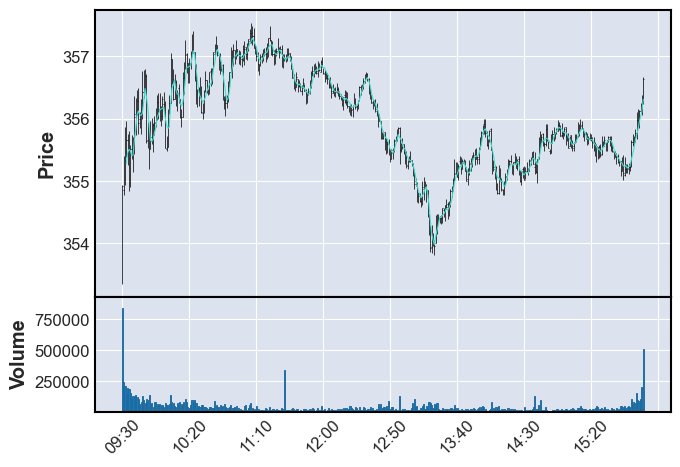

In [25]:
mpf.plot(MSFT_day1, mav = 4, volume=True)

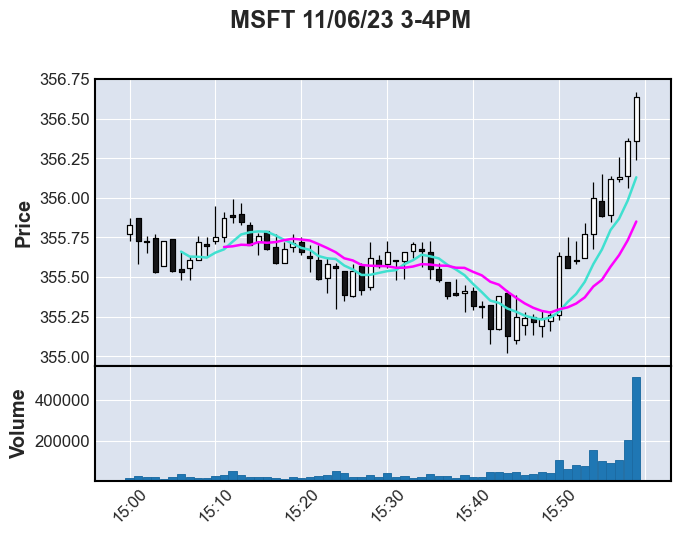

In [33]:
LastHour = MSFT_day1.loc['2023-11-06 15:00':'2023-11-06 16:00',:]
mpf.plot(LastHour, type="candle", mav=(7,12), volume=True, title="MSFT 11/06/23 3-4PM")